In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from general_utils import utils
import pickle as pkl
import numpy as np
import importlib
import project_utils.PatientBootstrap as PBS
import os

utils.default_plot_format()

#utils.pd_display_settings(3)


In [4]:
data_path = r"processed_data\raw_metrics\processed_10min_Nabian.pkl"

In [5]:


pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]

data.head()

,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,ULF Peak Power,VLF Power,...,UCr (g),UACR (mg÷g),Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition
0,0.764,600.396,59.953222,50.339557,4.161567,81.746048,2.811084e-09,0.000000,1.972500e-06,0.000002,...,NaN,NaN,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
1,72044.620,72644.440,50.436358,50.276590,11.294766,72.622536,4.896880e-10,0.001667,3.819060e-07,0.000001,...,18.13,0.533922,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
2,71444.292,72043.800,44.108359,39.049144,11.699164,71.855928,6.034593e-09,0.000000,4.631651e-06,0.000002,...,18.13,0.533922,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
3,70844.052,71443.432,64.323347,47.553402,9.686221,73.359897,8.791265e-09,0.000000,7.081658e-06,0.000004,...,18.13,0.533922,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes
4,70243.220,70843.104,111.205365,95.765520,6.415621,71.718719,1.290554e-08,0.001667,8.629014e-06,0.000008,...,18.13,0.533922,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes


In [6]:
print("time_metrics =", time_metrics)
print("frequency_metrics =", frequency_metrics)
print("non_linear_metrics =", non_linear_metrics)

time_metrics = ['SDRR', 'RMSSD', 'pNN50 (%)', 'Mean HR (bpm)']
frequency_metrics = ['VLF Power', 'VLF Peak Frequency', 'LF Power', 'LF Peak Frequency', 'HF Power', 'HF Peak Frequency', 'LF÷HF Ratio']
non_linear_metrics = ['S', 'SD1', 'SD2', 'SD1÷SD2', 'ApEn', 'SampEn', 'DFA α1', 'DFA α2', 'D2']


# Resample mean for each condition repeatedly


In [7]:
control_id = data[~data['DPN']].id.unique()
dpn_id = data[data['DPN']].id.unique()

print(control_id, dpn_id)

[ 0  3  4  5  7 11 12 14 15 21 22 23 24 25 26 27 28 29 30 31 33 35] [37 38 39 40]


In [8]:
sampler = PBS.PatientBootstrap(data, n = 100000)

for metric in indicator_columns:
    sampler.sample_dpn_control(metric, dpn_id=dpn_id, control_id=control_id)

bayes_table = sampler.evaluate_bayes_metrics()

display(bayes_table.sort_values('Bayes_p', ascending=True))

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00140,-4.839037,5.516182,-3.066582,0.386674
0,LF Power,0.09649,0.000038,0.000016,0.000064,0.000012
0,HF Power,0.09773,0.000409,0.000116,0.000583,0.000057
0,Mean HR (bpm),0.10428,81.815293,4.845631,75.154460,2.021035
0,pNN50 (%),0.10608,6.303667,5.160906,14.627568,3.041904
0,SD2,0.11562,70.667975,26.765748,108.312188,11.627705
0,SDRR,0.12931,57.768967,23.595916,89.455939,10.295887
0,SD1,0.16062,38.293063,20.737974,62.173255,9.353615
0,RMSSD,0.16191,54.279601,29.408433,87.941578,13.244753
0,DFA α2,0.16937,0.956463,0.114421,0.839630,0.043131


## Bootstrapped Metric Distributions
### Bootstrapped Time Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SDRR,0.12931,57.768967,23.595916,89.455939,10.295887


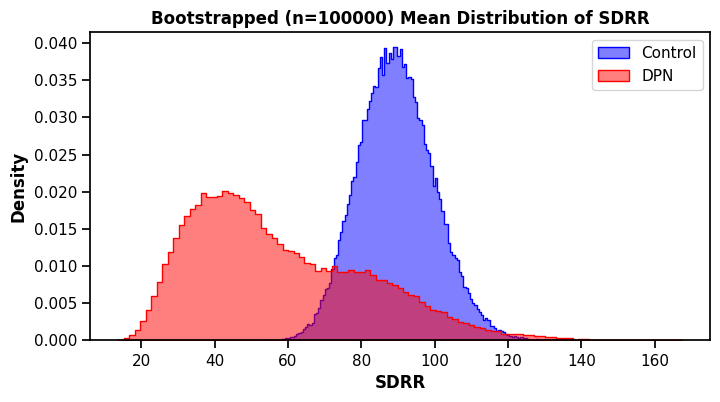

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,RMSSD,0.16191,54.279601,29.408433,87.941578,13.244753


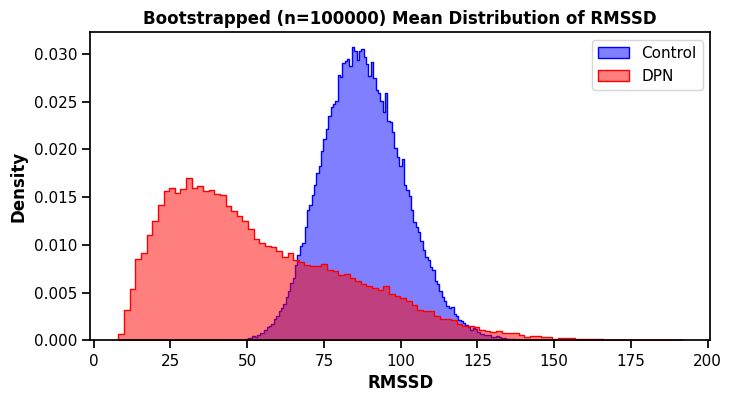

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,pNN50 (%),0.10608,6.303667,5.160906,14.627568,3.041904


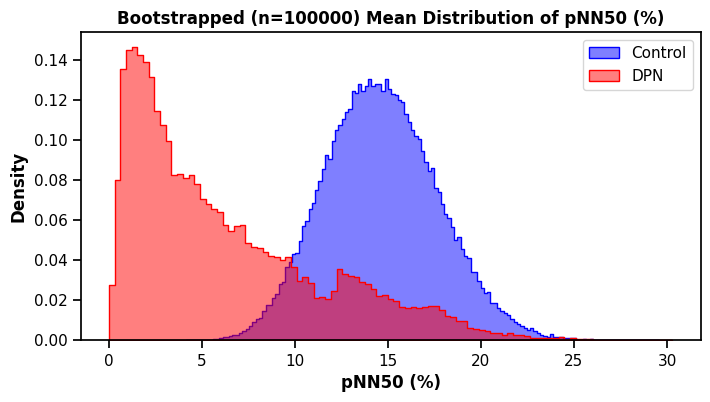

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,Mean HR (bpm),0.10428,81.815293,4.845631,75.15446,2.021035


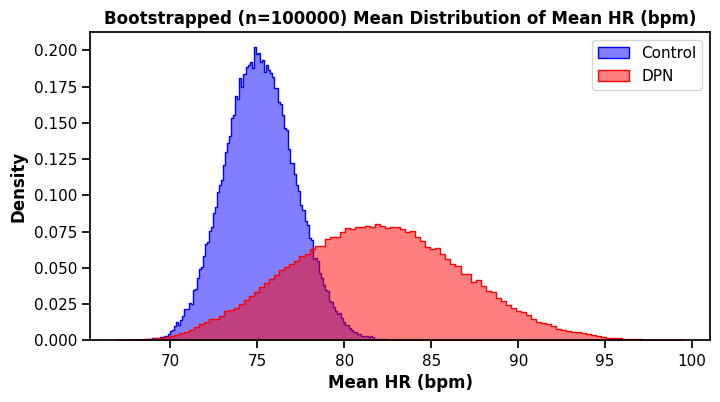

In [9]:
sampler.show_bayes_metrics(time_metrics)

### Bootstrapped Frequency Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,VLF Power,0.31932,0.000008,0.000008,0.000009,0.000003


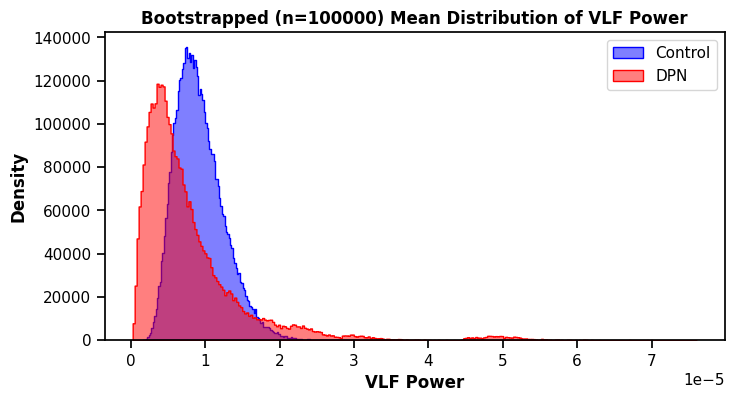

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,VLF Peak Frequency,0.37501,0.028865,0.003789,0.030329,0.001398


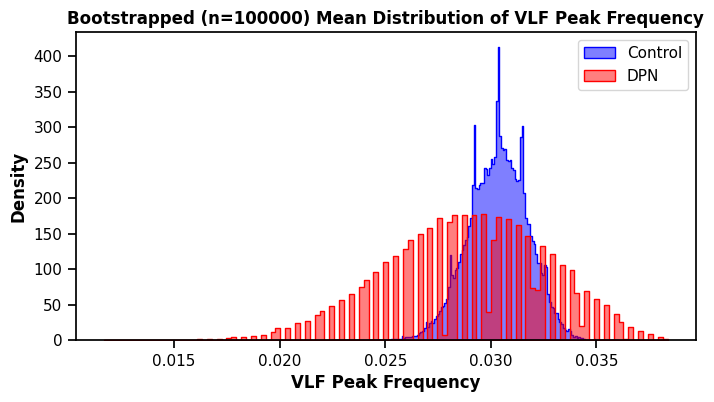

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF Power,0.09649,0.000038,0.000016,0.000064,0.000012


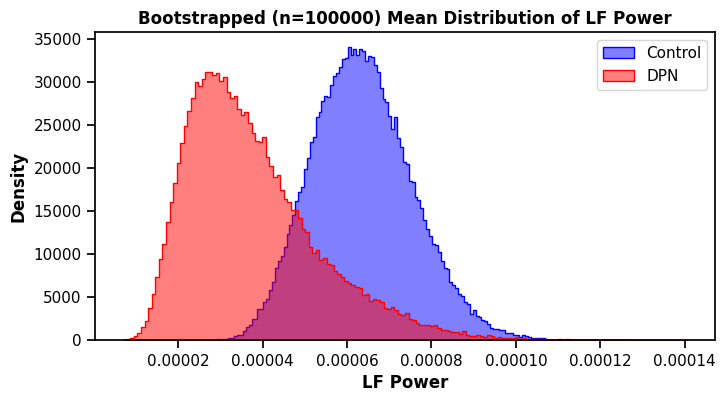

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF Peak Frequency,0.31997,0.101919,0.017387,0.11089,0.006277


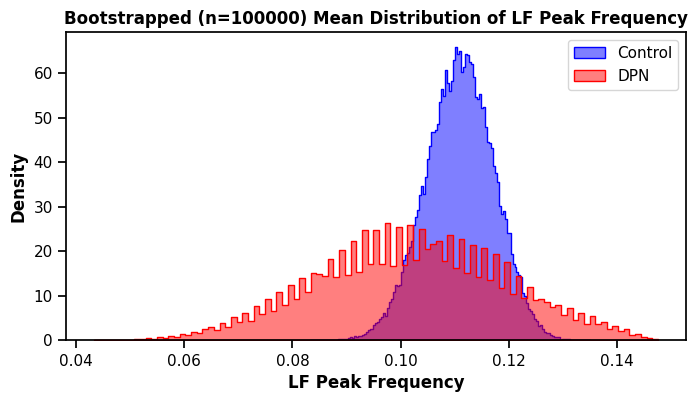

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,HF Power,0.09773,0.000409,0.000116,0.000583,0.000057


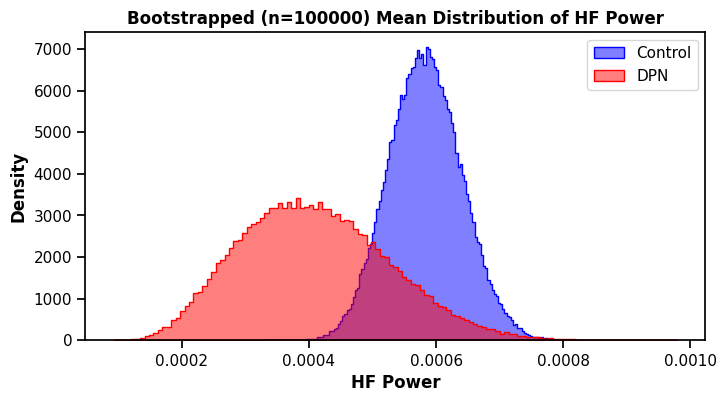

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,HF Peak Frequency,0.30121,0.340561,0.024169,0.326666,0.011266


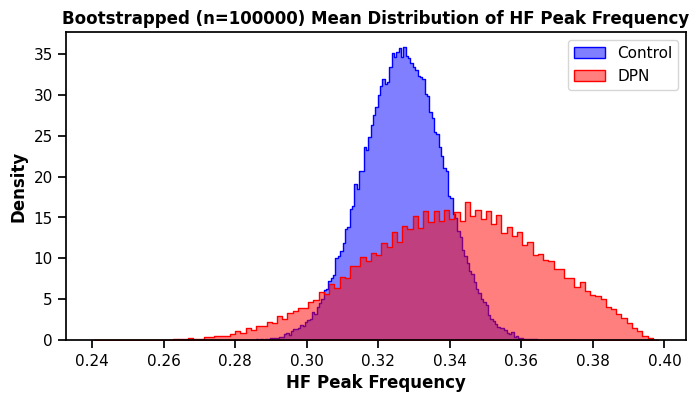

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF÷HF Ratio,0.36157,0.110973,0.045867,0.123976,0.025067


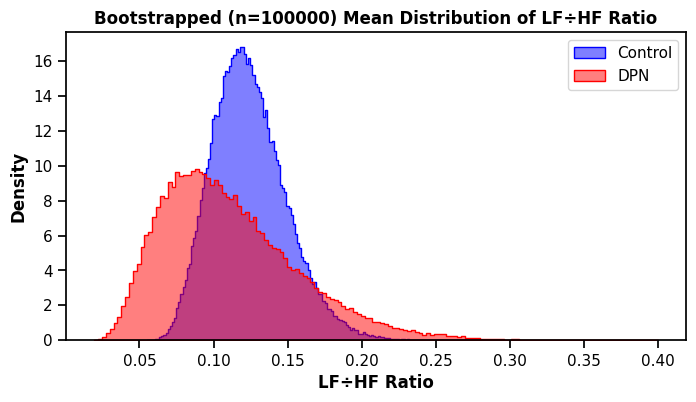

In [10]:
sampler.show_bayes_metrics(frequency_metrics)

There are significant issues with LF HF frequency calculation, as indicated by discontinuous means. 

### Bootstrapped Non Linear Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,S,0.22102,17803.940977,17421.32615,31445.872893,8673.401155


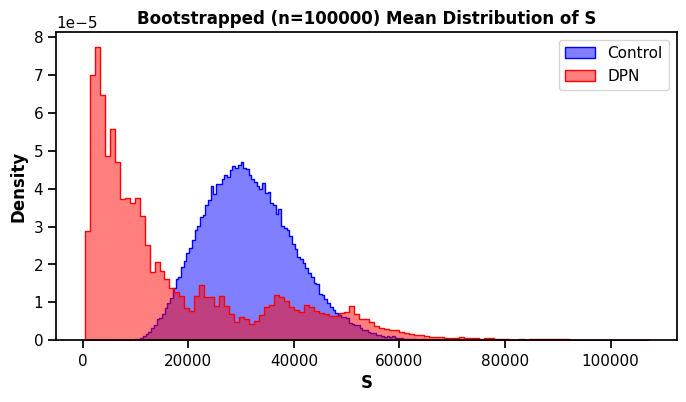

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1,0.16062,38.293063,20.737974,62.173255,9.353615


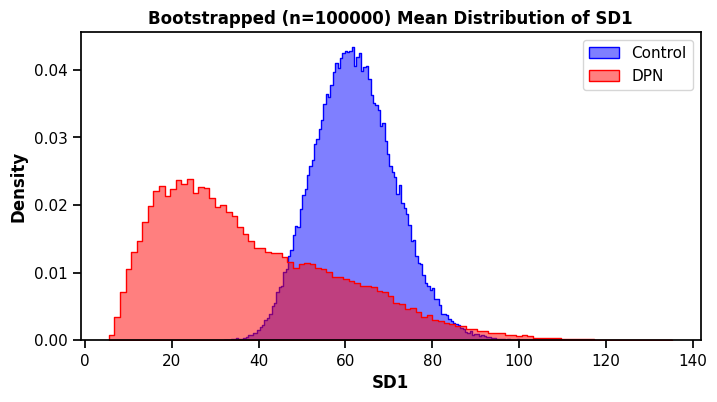

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD2,0.11562,70.667975,26.765748,108.312188,11.627705


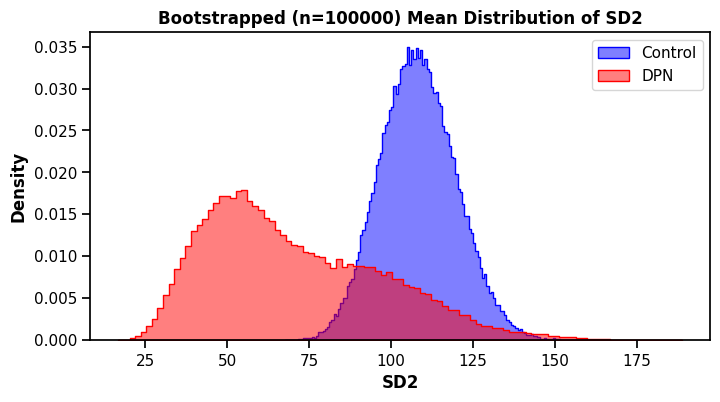

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1÷SD2,0.27369,0.457244,0.107625,0.523039,0.039494


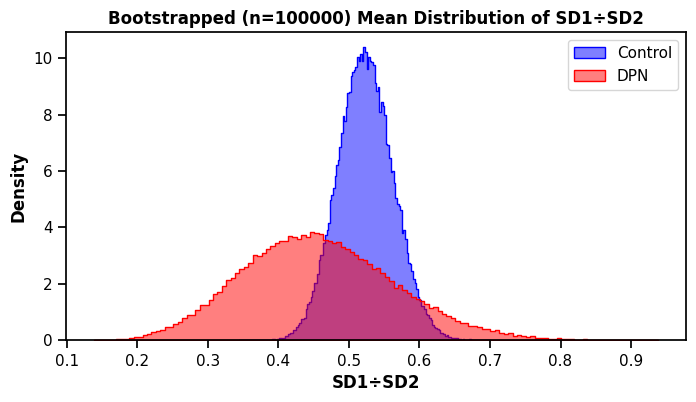

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,ApEn,0.49234,0.929456,0.159184,0.93184,0.052619


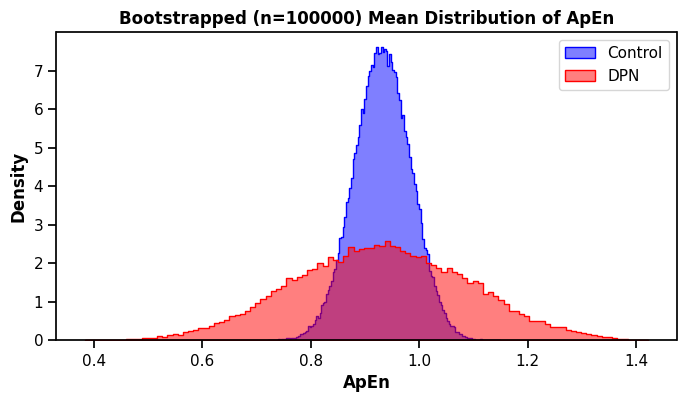

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SampEn,0.47417,0.966244,0.234637,0.938331,0.080616


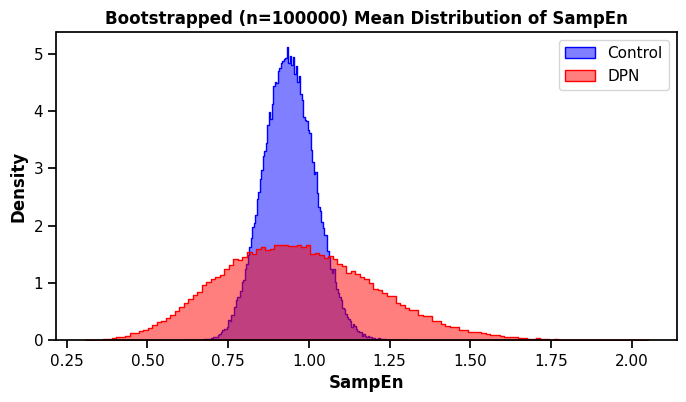

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α1,0.42646,0.951343,0.135112,0.924222,0.045009


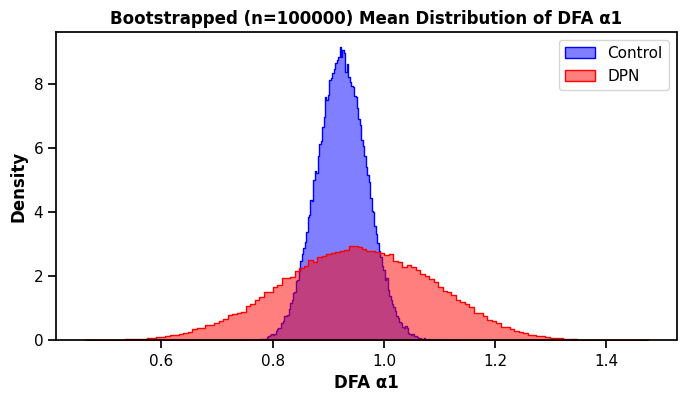

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α2,0.16937,0.956463,0.114421,0.83963,0.043131


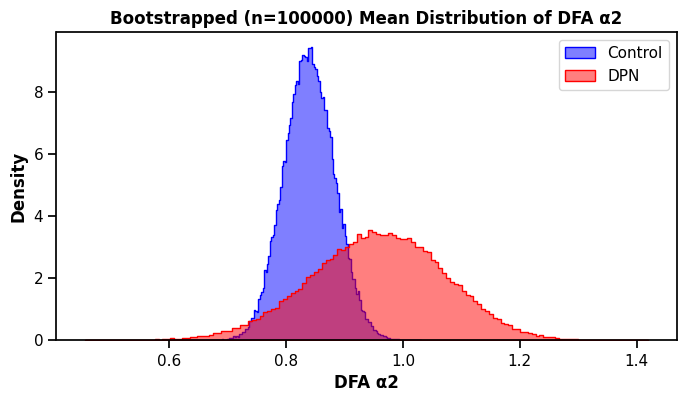

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.0014,-4.839037,5.516182,-3.066582,0.386674


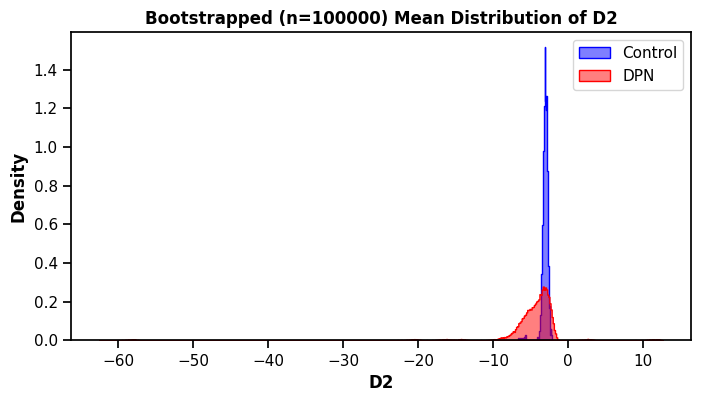

In [11]:
sampler.show_bayes_metrics(non_linear_metrics)

# Dumb classifier approach

this has yielded no good results

I have an idea that checking how suitable each value is for each population would allow me to classify the data

Construct a model that could tell how likely is each value to belong to one of the two pupulations.

Fit a gaussian model onto of each distribution.

In [12]:
from scipy.stats import norm

gaussian_dpn = {}
gaussian_controls ={}

for row in bayes_table.iterrows():
    metric = row[1]['Metric']

    dpn_mean = row[1]['DPN_Mean']
    dpn_std = row[1]['DPN_Std']
    gaussian_dpn[metric] = norm(dpn_mean, dpn_std)

    control_mean = row[1]['Control_Mean']
    control_std = row[1]['Control_Std']
    gaussian_controls[metric] = norm(control_mean, control_std)


calculate the chances of each value belonging to the distribution

In [16]:
chances = pd.DataFrame()
for row in data.iterrows():
  
    chance_dpn = {"x_"+metric: 1-gaussian_dpn[metric].pdf(row[1][metric]) for metric in indicator_columns}

    chance_control = {"c_"+metric: 1-gaussian_controls[metric].pdf(row[1][metric]) for metric in indicator_columns}

    chance_dpn = {k: v if 0 <= v <= 1 else 1 for k, v in chance_dpn.items()}
    chance_control = {k: v if 0 <= v <= 1 else 1 for k, v in chance_control.items()}
    
    chance_dpn = pd.Series(chance_dpn)
    chance_control = pd.Series(chance_control)

    result = {
        'DPN': row[1]['DPN'],
        'DPN_chance': chance_dpn.prod(),
        'control_chance': chance_control.prod(),
        **chance_dpn,
        **chance_control
    }


    chances = pd.concat([chances, pd.DataFrame([result])], ignore_index=True)

chances.tail()

,DPN,DPN_chance,control_chance,x_SDRR,x_RMSSD,x_pNN50 (%),x_Mean HR (bpm),x_VLF Power,x_VLF Peak Frequency,x_LF Power,...,c_LF÷HF Ratio,c_S,c_SD1,c_SD2,c_SD1÷SD2,c_ApEn,c_SampEn,c_DFA α1,c_DFA α2,c_D2
3205,True,0.781958,0.045701,0.991165,0.991839,0.935995,0.924512,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.00000,0.129123,1.0,1.0,0.374660,0.979376,1.000000
3206,True,0.038995,0.748444,0.987076,0.989280,0.966957,0.944639,1.0,1.0,1.0,...,0.939812,1.000000,0.999989,1.00000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
3207,True,0.170724,0.653739,0.987798,0.987570,0.999981,0.962812,1.0,1.0,1.0,...,0.995042,1.000000,0.999898,1.00000,0.917527,1.0,1.0,0.991139,1.000000,1.000000
3208,True,0.351501,0.246743,0.992765,0.989896,0.963363,0.927482,1.0,1.0,1.0,...,1.000000,0.999999,0.999995,0.98467,1.000000,1.0,1.0,0.309050,1.000000,0.964122
3209,True,0.434375,0.779977,1.000000,1.000000,0.999336,0.971620,1.0,1.0,1.0,...,0.972614,1.000000,1.000000,1.00000,1.000000,1.0,1.0,0.999979,1.000000,1.000000


In [17]:
chances["shows_dpn"] = chances["DPN_chance"] > chances["control_chance"]

chances["true_positive"] = chances["shows_dpn"] & chances["DPN"]
chances["false_positive"] = chances["shows_dpn"] & ~chances["DPN"]
chances["true_negative"] = ~chances["shows_dpn"] & ~chances["DPN"]
chances["false_negative"] = ~chances["shows_dpn"] & chances["DPN"]


results = {
    "true_positive": chances["true_positive"].mean(),
    "true_negative": chances["true_negative"].mean(),
    "false_positive": chances["false_positive"].mean(),
    "false_negative": chances["false_negative"].mean()
}

print(results)

{'true_positive': 0.045171339563862926, 'true_negative': 0.5367601246105919, 'false_positive': 0.29190031152647977, 'false_negative': 0.1261682242990654}


In [18]:
for metric in indicator_columns:
    chances[f"x_higher_{metric}"] = chances[f"x_{metric}"] > chances[f"c_{metric}"]


chances["dpn_favoring_metrics_count"] = chances[[f"x_higher_{metric}" for metric in indicator_columns]].sum(axis=1)
chances["control_favoring_metrics_count"] = len(indicator_columns) - chances["dpn_favoring_metrics_count"]


chances["dpn_favor_percentage"] = chances["dpn_favoring_metrics_count"] / len(indicator_columns) * 100
chances["control_favor_percentage"] = chances["control_favoring_metrics_count"] / len(indicator_columns) * 100

metric_counts = {
    "avg_dpn_favoring_metrics": chances["dpn_favoring_metrics_count"].mean(),
    "avg_control_favoring_metrics": chances["control_favoring_metrics_count"].mean(),
    "avg_dpn_favor_percentage": chances["dpn_favor_percentage"].mean(),
    "avg_control_favor_percentage": chances["control_favor_percentage"].mean()
}

print("Average metrics per patient:")
for key, value in metric_counts.items():
    print(f"{key}: {value:.2f}")


print("\nAverage for actual DPN patients:")
print(f"dpn_favoring_metrics: {chances[chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

print("\nAverage for actual control patients:")
print(f"dpn_favoring_metrics: {chances[~chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[~chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

Average metrics per patient:
avg_dpn_favoring_metrics: 5.30
avg_control_favoring_metrics: 14.70
avg_dpn_favor_percentage: 26.50
avg_control_favor_percentage: 73.50

Average for actual DPN patients:
dpn_favoring_metrics: 4.73
control_favoring_metrics: 15.27

Average for actual control patients:
dpn_favoring_metrics: 5.42
control_favoring_metrics: 14.58
